In [30]:
import pydub
import numpy as np 
import wave
import matplotlib.pyplot as plt
import tensorflow as tf 
import cv2
import librosa
import librosa.display

In [31]:
wav,sr=librosa.load("2_lemon.mp3",sr=44100)

C:\Users\sihn6\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


<Figure size 432x288 with 0 Axes>

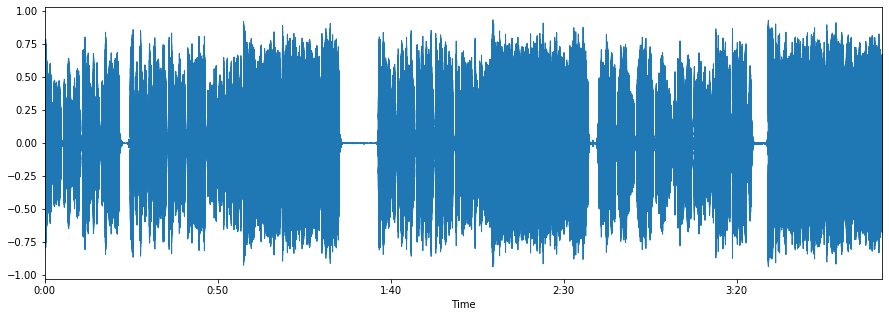

In [3]:
#周波数を可視化
plt.figure()
plt.figure(figsize=(15,5))
librosa.display.waveplot(wav,sr)

In [13]:
S = librosa.feature.melspectrogram(wav, sr=sr, n_mels=128,hop_length=2048,n_fft=2048,fmax=8192)

In [14]:
log_S = librosa.amplitude_to_db(S, ref=np.max)

In [81]:
x_data=np.load("x_data.npy")

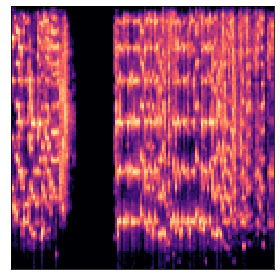

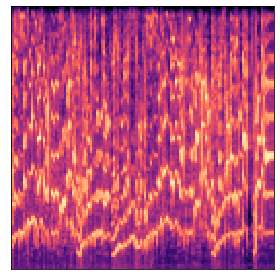

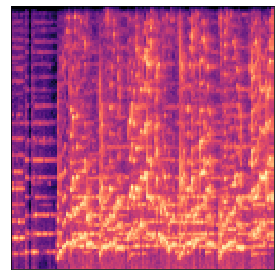

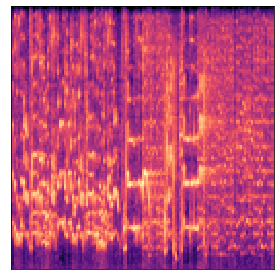

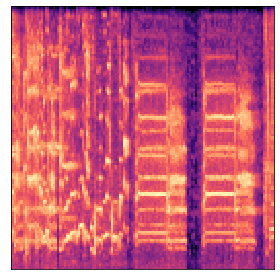

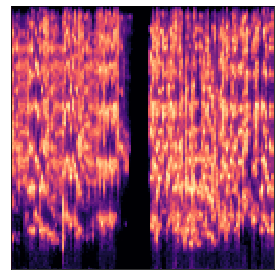

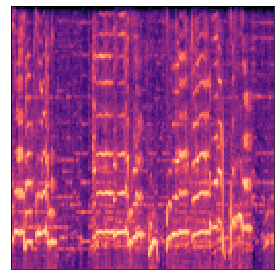

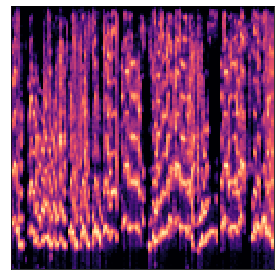

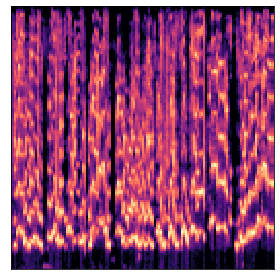

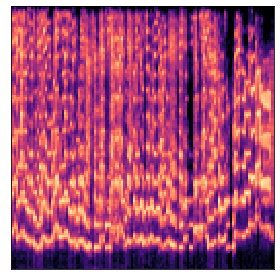

In [82]:
#ボーカル抽出した音源のメル周波数を可視化
for i in range(10):
    plt.figure(figsize=(4,4))
    librosa.display.specshow(x_data[i,:,:], sr=4410)
    plt.tight_layout()

In [4]:
#wavファイルのリストからメス周波数スペクトルをそれぞれ取得し配列にする
def ar(list):
    a=np.empty([1,128,128])
    for l in list:
        e=to_mel(l)
        f=e[np.newaxis,:,:]
        a=np.concatenate([a,f],0)
    a=a[1:,:,:]
    return a

In [5]:
#mp3ファイルの時間によって無音部分を省くための処理
def divide_song(path,a,b,c):
    sound = pydub.AudioSegment.from_mp3(path)
    sound_split=sound[a*1000:(b*60000+c*1000)]
    sound_split.export(path,format="mp3")

In [14]:
#無音部分処理場所
divide_song("3_日常.mp3",11,4,11)

In [15]:
#mp3ファイルをwavファイルに変換して分割。分割は 10秒ずつずらしながら30秒ごとに区切って行う
def to_wav2(path):
    sound = pydub.AudioSegment.from_mp3(path)
    music=[]
    split=int((len(sound)-30000)//10000)
    for i in range(split+1):
        sound_split=sound[0+10000*i:30000+10000*i]
        str=path[:-4]+"[{}]".format(i)+".wav"
        sound_split.export(str)
        music.append(str)
    return music

In [16]:
#wavファイルのメル周波数を数値化
def to_mel(path,n_mels=128,hop_length=1034,n_fft=2048):
    y, sr = librosa.load(path, sr=4410, offset=0.0)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length, n_fft=n_fft)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S

In [17]:
#複数曲のリストに対してto_wav()を実行する
def to_wav_list(list):
    music=[]
    for song in list:
        songs=to_wav2(song)
        music=music+songs
    return music

In [18]:
#ラベル付け 
def make_label(list):
    label=[]
    for song in list:
        label.append(int(song[0]))
    return label

In [ ]:
#間奏や前奏などの無音部分を画像で確認する
for i  in range(len(x)):
    plt.figure(figsize=(4,4))
    librosa.display.specshow(x[i,:,:], sr=4410)
    plt.tight_layout()

In [116]:
list_3=["3_adventure.mp3","3_kickspin.mp3","3_mosquito.mp3","3_pray.mp3","3_runaway.mp3","3_アルペジオ.mp3","3_ワタリドリ.mp3","3_明日また.mp3"]

In [117]:
list_3=to_wav_list(list_3)

In [118]:
x=ar(list_3)

In [120]:
y=np.array(make_label(list_3))

In [121]:
y_list=make_label(list_3)

In [130]:
list_2=["2_game.mp3","2_hero.mp3","2_squall.mp3","2_化身.mp3","2_家族になろうよ.mp3","2_心color.mp3","2_想.mp3","2_桜坂.mp3"]

In [131]:
list_2=to_wav_list(list_2)

In [132]:
x=np.concatenate([x,ar(list_2)],0)  #アレキサンドロス、福山のメル周波スペクトグラム画像データ

In [134]:
y_list=y_list+make_label(list_2)  #アレキサンドロス、福山のラベルリスト

In [137]:
list_6=["6_Flamingo_vocal.mp3","6_LOSER_vocal.mp3","6_MADHEADLOVE_vocal.mp3","6_orion_vocal.mp3","6_アイネクライネ_vocal.mp3","6_アンビリーバーズ_vocal.mp3","6_パプリカ_vocal.mp3","6_ピースサイン_vocal.mp3","6_感電_vocal.mp3"]

In [148]:
list_6=to_wav_list(list_6)

In [149]:
x=np.concatenate([x,ar(list_6)],0) #アレキサンドロス、福山、米津のメル周波数　画像データ

In [151]:
y_list=y_list+make_label(list_6)

In [167]:
list_0=["0_AintNobodyKnow_vocals.mp3","0_アイデア_vocals.mp3","0_恋_vocals.mp3","0_折り合い_vocals.mp3","0_時よ_vocals.mp3","0_私_vocals.mp3","0_ドラえもん.mp3","0_familysong.mp3","0_くだらないの中に.mp3"]

In [168]:
list_0=to_wav_list(list_0)

In [169]:
x=np.concatenate([x,ar(list_0)],0)

In [171]:
y_list=y_list+make_label(list_0)

In [ ]:
list6=["1_beautiful.mp3","1_human.mp3","1_暁.mp3","3_snowmen.mp3","3_肌.mp3","3_雨音.mp3"]
list6=to_wav_list(list6)
x=np.concatenate([x,ar(list6)],0)
y_fake_list2=y_fake_list2+make_label(list6)

In [ ]:
list7=["2_Flowerwall_vocals.mp3","2_vivi_vocals.mp3","2_WOODENDALL_vocals.mp3","2_サンタマリア_vocals.mp3","2_フローライト_vocals.mp3","2_リビングデッドユース_vocals.mp3","2_恋と病熱_vocals.mp3"]
list7=to_wav_list(list7)
x=np.concatenate([x,ar(list7)],0)
y_list=y_list+make_label(list7)

In [ ]:
list8=["1_heart.mp3","1_heaven.mp3","1_hello.mp3","1_melody.mp3","1_message.mp3","1_onlylove.mp3","1_peach.mp3","1_wow.mp3"]
list8=to_wav_list(list8)
x=np.concatenate([x,ar(list8)],0)
y_list=y_list+make_label(list8)

In [ ]:
list9=["0_city.mp3","0_famousday.mp3","0_feellike.mp3","0_kids.mp3","0_newwall.mp3","0_philosophy.mp3","0_spy.mp3","0_月夜ホライズン.mp3","0_涙がこぼれそう.mp3"]
list9=to_wav_list(list9)
x=np.concatenate([x,ar(list9)],0)
y_list=y_list+make_label(list9)

In [19]:
#テストデータ作成
list_test=["0_dog3.mp3","0_ドラキュラ.mp3","0_言え.mp3","1_fight.mp3","1_東京にも.mp3","1_泣いたり.mp3","2_lemon.mp3","2_灰色と青.mp3","3_くせ.mp3","3_フィルム.mp3","3_日常.mp3"]
list_test=to_wav_list(list_test)
y_test=make_label(list_test)

In [20]:
x_test=ar(list_test)

C:\Users\sihn6\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
C:\Users\sihn6\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [21]:
y_test=np.array(y_test)

In [ ]:
y=np.array(y_list)

In [26]:
#間奏部分を含んだデータのインデックス（手動）
list_index=[4,5,28,29,30,44,45,51,52,53,54,58,63,64,72,73,80,81,82,83,84,85,86,96,97,118,119,120,149,150,151,152,153,171,172,179,180]

In [27]:
#間奏部分を含んだデータの除去
y_test=np.delete(y_test,list_index,0)
x_test=np.delete(x_test,list_index,0)

In [ ]:
#メル周波数をスペクトグラム化し画像データの画素値を配列にする(訓練データ)
color=np.zeros((1,262,262,3))
for i in range(len(x)):
    plt.figure(figsize=(4,4))
    librosa.display.specshow(x[i,:,:], sr=44100)
    plt.tight_layout()
    plt.savefig("img.png")
    img=cv2.imread("img.png")
    img_toriming=img[12:274,15:277,:]
    img_toriming=img_toriming.reshape((1,262,262,3))
    color=np.concatenate([color,img_toriming],0)
    
x=color[1:,:,:,:]

In [ ]:
#配列をシャッフル
p=np.random.permutation(len(x))
x=x[p]
y=y[p]

In [6]:
x=np.load("color.npy")
y=np.load("y_data.npy")

In [7]:
x_test=np.load("x_test.npy")
y_test=np.load("y_test.npy")

In [9]:
x=x/255
x_test=x_test/255

In [13]:
np.save("color.npy",x)
np.save("x_test.npy",x_test)

In [67]:
#3次元画像読み込み、4次元配列作成まで自動化(テストデータ)

color=np.zeros((1,262,262,3))
for i in range(len(x_test)):
    plt.figure(figsize=(4,4))
    librosa.display.specshow(x_test[i,:,:], sr=44100)
    plt.tight_layout()
    plt.savefig("img.png")
    img=cv2.imread("img.png")
    img_toriming=img[12:274,15:277,:]
    img_toriming=img_toriming.reshape((1,262,262,3))
    color=np.concatenate([color,img_toriming],0)
    
x_test=color[1:,:,:,:]

In [ ]:
#画素値を正規化し保存
x=x/255
x_test=x_tesy/255
x=np.delete(x,list_index,0)
np.save("x_data.npy",x)
np.save("y_data.npy",y)
np.save("x_test.npy",x_test)
np.save("y_test.npy",y_test)

In [10]:
#畳み込みモデル
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(262,262,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4,activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 260, 260, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 260, 260, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 130, 130, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 130, 130, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history=model.fit(x,y,epochs=12)

Train on 926 samples
Epoch 1/12
926/926 [==============================] - 119s 129ms/sample - loss: 30.2237 - accuracy: 0.2581
Epoch 2/12
926/926 [==============================] - 121s 130ms/sample - loss: 10.4880 - accuracy: 0.3931
Epoch 3/12
926/926 [==============================] - 100s 108ms/sample - loss: 10.4930 - accuracy: 0.4622
Epoch 4/12
926/926 [==============================] - 131s 141ms/sample - loss: 7.4546 - accuracy: 0.5616
Epoch 5/12
926/926 [==============================] - 95s 103ms/sample - loss: 6.6492 - accuracy: 0.5940
Epoch 6/12
926/926 [==============================] - 76s 82ms/sample - loss: 6.7565 - accuracy: 0.6274
Epoch 7/12
926/926 [==============================] - 104s 112ms/sample - loss: 5.9345 - accuracy: 0.6501
Epoch 8/12
926/926 [==============================] - 119s 128ms/sample - loss: 6.7567 - accuracy: 0.6685
Epoch 9/12
926/926 [==============================] - 85s 92ms/sample - loss: 6.2941 - accuracy: 0.6706
Epoch 10/12
926/926 [======

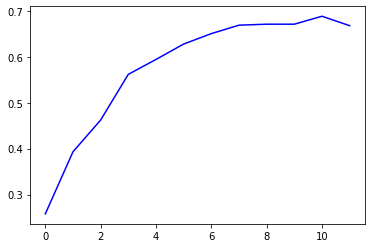

In [17]:
#エポックごとのaccuracyを可視化
acc=history.history["accuracy"]
loss=history.history["loss"]
epochs=range(len(acc))

plt.plot(epochs,acc,"b",label="Train acc")

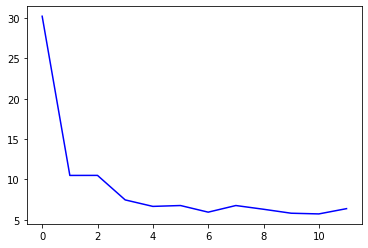

In [18]:
#エポックごとのlossを可視化
plt.plot(epochs,loss,"b",label="Train loss")

In [19]:
#テストデータに対する予測（出力）
np.argmax(model.predict(x_test),axis=1)

array([1, 3, 3, 3, 1, 1, 1, 0, 0, 3, 1, 1, 3, 0, 0, 3, 3, 0, 1, 2, 2, 1,
       1, 1, 0, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 0, 3, 1, 3, 3, 1, 1,
       3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 1, 3, 1, 3, 0, 1, 3, 1, 3, 0, 0,
       1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 0, 3, 3, 1, 3,
       1, 3, 2, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 2, 3, 3, 1, 1, 1, 3, 3,
       1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 0, 1, 0, 3, 1, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 1, 0, 3, 3, 0, 3, 3, 1, 3, 1, 3, 3],
      dtype=int64)

In [20]:
model_1=tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(262,262,3)))
model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_1.add(tf.keras.layers.Conv2D(16,(3,3),activation="relu"))
model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(4,activation="softmax"))

In [21]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history_1=model_1.fit(x,y,epochs=12)

Train on 926 samples
Epoch 1/12
926/926 [==============================] - 37s 40ms/sample - loss: 12.4761 - accuracy: 0.2775
Epoch 2/12
926/926 [==============================] - 30s 32ms/sample - loss: 5.1106 - accuracy: 0.4698
Epoch 3/12
926/926 [==============================] - 25s 27ms/sample - loss: 3.9266 - accuracy: 0.5853
Epoch 4/12
926/926 [==============================] - 25s 27ms/sample - loss: 4.4395 - accuracy: 0.6231
Epoch 5/12
926/926 [==============================] - 24s 26ms/sample - loss: 4.4637 - accuracy: 0.6555
Epoch 6/12
926/926 [==============================] - 29s 31ms/sample - loss: 3.8687 - accuracy: 0.6803
Epoch 7/12
926/926 [==============================] - 23s 25ms/sample - loss: 3.6195 - accuracy: 0.6825
Epoch 8/12
926/926 [==============================] - 27s 29ms/sample - loss: 3.8635 - accuracy: 0.6879
Epoch 9/12
926/926 [==============================] - 24s 26ms/sample - loss: 4.5703 - accuracy: 0.6771
Epoch 10/12
926/926 [=====================

In [23]:
np.argmax(model_1.predict(x_test),axis=1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 3, 2, 3,
       2, 0, 3, 2, 2, 3, 3, 2, 3, 3, 3, 1, 0, 3, 2, 3, 2, 2, 2, 3, 0, 0,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       1, 3, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 1, 2, 3,
       2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3],
      dtype=int64)

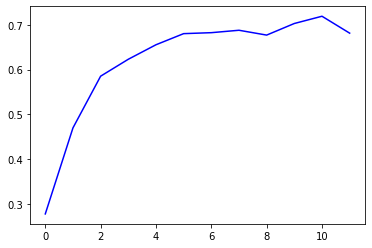

In [24]:
#エポックごとのaccuracyを可視化
acc=history_1.history["accuracy"]
loss=history_1.history["loss"]
epochs=range(len(acc))

plt.plot(epochs,acc,"b",label="Train acc")

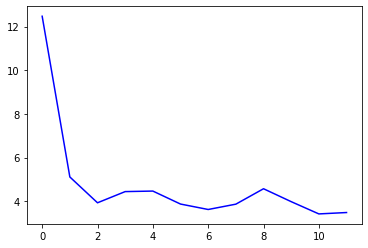

In [25]:
#エポックごとのlossを可視化
plt.plot(epochs,loss,"b",label="Train loss")

In [40]:
x_=np.load("x_data.npy")

In [49]:
x_train=x_train/255

In [62]:
np.save("x_train.npy",x_train)

In [50]:
#転移学習(VGG16)
base_model = tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

In [51]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [58]:
model_b = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [59]:
model_b.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 260       
Total params: 16,320,644
Trainable params: 1,605,956
Non-trainable params: 14,714,688
_________________________________________________________________


In [60]:
base_model.trainable = False
model_b.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
history=model_b.fit(x_train,y,epochs=15)

Train on 926 samples
Epoch 1/15
926/926 [==============================] - 437s 472ms/sample - loss: 1.3864 - accuracy: 0.3283
Epoch 2/15
926/926 [==============================] - 405s 437ms/sample - loss: 1.2658 - accuracy: 0.4320
Epoch 3/15
926/926 [==============================] - 471s 509ms/sample - loss: 1.2031 - accuracy: 0.4892
Epoch 4/15
926/926 [==============================] - 500s 540ms/sample - loss: 1.1454 - accuracy: 0.5162
Epoch 5/15
926/926 [==============================] - 446s 482ms/sample - loss: 1.0939 - accuracy: 0.5497
Epoch 6/15
926/926 [==============================] - 418s 451ms/sample - loss: 1.0503 - accuracy: 0.5734
Epoch 7/15
926/926 [==============================] - 438s 473ms/sample - loss: 1.0034 - accuracy: 0.5950
Epoch 8/15
926/926 [==============================] - 455s 491ms/sample - loss: 0.9569 - accuracy: 0.6317
Epoch 9/15
926/926 [==============================] - 455s 491ms/sample - loss: 0.9272 - accuracy: 0.6393
Epoch 10/15
926/926 [====

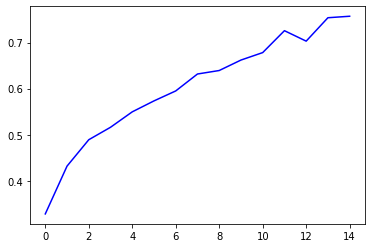

In [68]:
#エポックごとのaccuracyを可視化
acc=history.history["accuracy"]
loss=history.history["loss"]
epochs=range(len(acc))

plt.plot(epochs,acc,"b",label="Train acc")

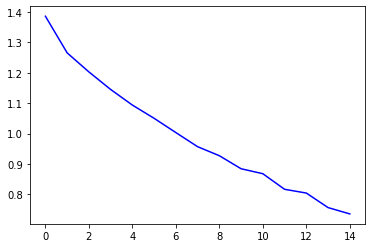

In [69]:
plt.plot(epochs,loss,"b",label="Train loss")

In [72]:
np.argmax(model_b.predict(x_test_resize1),axis=1)

array([3, 0, 1, 3, 0, 3, 3, 0, 0, 2, 0, 0, 1, 0, 0, 3, 3, 0, 0, 2, 2, 0,
       1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0,
       3, 1, 1, 1, 1, 0, 0, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 3, 2, 2, 0, 2, 3, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2,
       3, 3, 3, 0, 1, 3, 3, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 3, 3, 0,
       0, 1, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 1, 0, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 1, 0, 0, 0, 2, 2, 1],
      dtype=int64)

In [73]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [77]:
#テストデータの評価
model_b.evaluate(x_test_resize1,y_test)

151/151 [==============================] - 290s 2s/sample - loss: 1.1047 - accuracy: 0.4768


[1.1046996069270254, 0.47682118]